## Carregamento dos dados

In [344]:
from braindecode.datasets import MOABBDataset

dataset = MOABBDataset(dataset_name="BNCI2014001", subject_ids=[9])

48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]


In [345]:
from braindecode.preprocessing import preprocess, Preprocessor
import numpy as np
from numpy import multiply

low_cut_hz = 4.
high_cut_hz = 38.
newfreq = 128
factor = 1e6

preprocessors = [
    Preprocessor('pick_types', eeg=True, meg=False, stim=False),
    Preprocessor(lambda data: multiply(data, factor)),
    Preprocessor('filter', l_freq=low_cut_hz, h_freq=high_cut_hz),
    Preprocessor("set_eeg_reference", ref_channels="average", ch_type="eeg")
]

preprocess(dataset, preprocessors, n_jobs=-1);

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 

/home/matias/Mestrado/venv_BCI/venv_BCI/lib/python3.7/site-packages/braindecode/preprocessing/preprocess.py:55: UserWarning: Preprocessing choices with lambda functions cannot be saved.
  warn('Preprocessing choices with lambda functions cannot be saved.')


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)

Applying average reference.
Applying a custom ('EEG',) reference.
Applying average reference.
Applying a custom ('EEG',) reference.
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
-

In [346]:
from braindecode.preprocessing import create_windows_from_events

sfreq = dataset.datasets[0].raw.info['sfreq']

trial_start_offset_seconds = -0.5
trial_start_offset_samples = int(trial_start_offset_seconds * sfreq)

windows_dataset = create_windows_from_events(
    dataset,
    trial_start_offset_samples=trial_start_offset_samples,
    trial_stop_offset_samples=0,
    preload=True,
)

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']


In [347]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

X_ = []
y_ = []

X_0 = []
X_1 = []
X_2 = []
X_3 = []

for X, y, (i_window_in_trial, i_start_sample, i_stop_sample) in windows_dataset:
    if y == 0:
        X_0.append(X)
    elif y == 1:
        X_1.append(X)
    elif y == 2:
        X_2.append(X)
    elif y == 3:
        X_3.append(X)
    X_.append(X)
    y_.append(y)

X_ = torch.as_tensor(X_).float()
y_ = torch.as_tensor(y_)

real_set = TensorDataset(X_, y_)

X_0 = torch.as_tensor(X_0).float()
X_1 = torch.as_tensor(X_1).float()
X_2 = torch.as_tensor(X_2).float()
X_3 = torch.as_tensor(X_3).float()

X_0 = torch.from_numpy(np.expand_dims(X_0, axis=1))
X_1 = torch.from_numpy(np.expand_dims(X_1, axis=1))
X_2 = torch.from_numpy(np.expand_dims(X_2, axis=1))
X_3 = torch.from_numpy(np.expand_dims(X_3, axis=1))

gen_set_0 = TensorDataset(X_0, torch.as_tensor(np.full(144, 0)))
gen_set_1 = TensorDataset(X_1, torch.as_tensor(np.full(144, 1)))
gen_set_2 = TensorDataset(X_2, torch.as_tensor(np.full(144, 2)))
gen_set_3 = TensorDataset(X_3, torch.as_tensor(np.full(144, 3)))

print(X_0.shape)
print(X_1.shape)
print(X_2.shape)
print(X_3.shape)
print(X_.shape)
print(y_.shape)

torch.Size([144, 1, 22, 1125])
torch.Size([144, 1, 22, 1125])
torch.Size([144, 1, 22, 1125])
torch.Size([144, 1, 22, 1125])
torch.Size([576, 22, 1125])
torch.Size([576])


In [348]:
from torch.utils.data import random_split

gen_set_0_tr, gen_set_0_vl = random_split(gen_set_0, [72, 72])
gen_set_1_tr, gen_set_1_vl = random_split(gen_set_1, [72, 72])
gen_set_2_tr, gen_set_2_vl = random_split(gen_set_2, [72, 72])
gen_set_3_tr, gen_set_3_vl = random_split(gen_set_3, [72, 72])

In [349]:
gen_loader_0_tr = DataLoader(dataset=gen_set_0_tr, batch_size=72, shuffle=True)
gen_loader_0_vl = DataLoader(dataset=gen_set_0_vl, batch_size=72, shuffle=True)
gen_loader_1_tr = DataLoader(dataset=gen_set_1_tr, batch_size=72, shuffle=True)
gen_loader_1_vl = DataLoader(dataset=gen_set_1_vl, batch_size=72, shuffle=True)
gen_loader_2_tr = DataLoader(dataset=gen_set_2_tr, batch_size=72, shuffle=True)
gen_loader_2_vl = DataLoader(dataset=gen_set_2_vl, batch_size=72, shuffle=True)
gen_loader_3_tr = DataLoader(dataset=gen_set_3_tr, batch_size=72, shuffle=True)
gen_loader_3_vl = DataLoader(dataset=gen_set_3_vl, batch_size=72, shuffle=True)

## Definição do modelo do VAE

In [350]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [351]:
class CNN_VAE(nn.Module):
    def __init__(self):
        super(CNN_VAE, self).__init__()
 
        self.enc1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=4, stride=2, padding=1)
        self.enc2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=4, stride=2, padding=1)
        self.enc3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=4, stride=2, padding=1)
        self.enc4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2, stride=2, padding=0)
        
        self.fc1 = nn.Linear(64, 128)
        self.fc_mu = nn.Linear(128, 4)
        self.fc_log_var = nn.Linear(128, 4)
        self.fc2 = nn.Linear(4, 64)
        
        self.dec1 = nn.ConvTranspose2d(in_channels=64, out_channels=64, kernel_size=(1, 140), stride=2, padding=0)
        self.dec2 = nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=(4, 4), stride=2, padding=0)
        self.dec3 = nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=(4, 1), stride=2, padding=0)
        self.dec4 = nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=(4, 1), stride=2, padding=0)

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        sample = mu + (eps * std)
        return sample
 
    def forward(self, x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = F.relu(self.enc4(x))
        batch, _, _, _ = x.shape
        x = F.adaptive_avg_pool2d(x, 1).reshape(batch, -1)
        hidden = self.fc1(x)
        
        mu = self.fc_mu(hidden)
        log_var = self.fc_log_var(hidden)
        
        z = self.reparameterize(mu, log_var)
        z = self.fc2(z)
        z = z.view(-1, 64, 1, 1)

        x = F.relu(self.dec1(z))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        reconstruction = torch.sigmoid(self.dec4(x))
        return reconstruction, mu, log_var

In [352]:
def final_loss(bce_loss, mu, logvar):
    BCE = bce_loss
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [353]:
def train(model, dataloader, dataset, device, optimizer, criterion):
    model.train()
    running_loss = 0.0
    counter = 0
    for i, data in tqdm(enumerate(dataloader), total=int(len(dataset)/dataloader.batch_size)):
        counter += 1
        data = data[0]
        data = data.to(device)
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        bce_loss = criterion(reconstruction, data)
        loss = final_loss(bce_loss, mu, logvar)
        loss.backward()
        running_loss += loss.item()
        optimizer.step()
    train_loss = running_loss / counter 
    return train_loss

In [354]:
def validate(model, dataloader, dataset, device, criterion):
    model.eval()
    running_loss = 0.0
    counter = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(dataset)/dataloader.batch_size)):
            counter += 1
            data= data[0]
            data = data.to(device)
            reconstruction, mu, logvar = model(data)
            bce_loss = criterion(reconstruction, data)
            loss = final_loss(bce_loss, mu, logvar)
            running_loss += loss.item()

            if i == int(len(dataset)/dataloader.batch_size) - 1:
                fake = reconstruction
    val_loss = running_loss / counter
    return val_loss, fake

In [355]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN_VAE().to(device)

In [356]:
from torchsummary import summary
summary(model, (1, 22, 1125))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 8, 11, 562]             136
            Conv2d-2           [-1, 16, 5, 281]           2,064
            Conv2d-3           [-1, 32, 2, 140]           8,224
            Conv2d-4            [-1, 64, 1, 70]           8,256
            Linear-5                  [-1, 128]           8,320
            Linear-6                    [-1, 4]             516
            Linear-7                    [-1, 4]             516
            Linear-8                   [-1, 64]             320
   ConvTranspose2d-9           [-1, 64, 1, 140]         573,504
  ConvTranspose2d-10           [-1, 32, 4, 282]          32,800
  ConvTranspose2d-11          [-1, 16, 10, 563]           2,064
  ConvTranspose2d-12          [-1, 1, 22, 1125]              65
Total params: 636,785
Trainable params: 636,785
Non-trainable params: 0
-------------------------------

In [357]:
lr = 0.001
epochs = 100
batch_size = 72
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss(reduction='sum')

In [358]:
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model, gen_loader_0_tr, gen_set_0_tr, device, optimizer, criterion
    )
    valid_epoch_loss, fake = validate(
        model, gen_loader_0_vl, gen_set_0_tr, device, criterion
    )
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f"Val Loss: {valid_epoch_loss:.4f}")
print('TRAINING COMPLETE')

Epoch 1 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 135.09it/s]


Train Loss: 1717911.7500
Val Loss: 1714570.0000
Epoch 2 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 141.89it/s]


Train Loss: 1714504.2500
Val Loss: 1710971.3750
Epoch 3 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 136.46it/s]


Train Loss: 1710657.1250
Val Loss: 1706872.7500
Epoch 4 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 128.78it/s]


Train Loss: 1706202.7500
Val Loss: 1701870.8750
Epoch 5 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 131.23it/s]


Train Loss: 1701722.6250
Val Loss: 1696684.1250
Epoch 6 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 132.57it/s]


Train Loss: 1695366.6250
Val Loss: 1687937.3750
Epoch 7 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 138.63it/s]


Train Loss: 1687094.7500
Val Loss: 1678837.8750
Epoch 8 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 135.49it/s]


Train Loss: 1676951.2500
Val Loss: 1667295.3750
Epoch 9 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 136.97it/s]


Train Loss: 1665357.8750
Val Loss: 1650915.3750
Epoch 10 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 134.54it/s]


Train Loss: 1650359.2500
Val Loss: 1631623.7500
Epoch 11 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 138.13it/s]


Train Loss: 1628157.6250
Val Loss: 1603047.2500
Epoch 12 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.17it/s]


Train Loss: 1599127.5000
Val Loss: 1559726.5000
Epoch 13 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.52it/s]


Train Loss: 1559625.0000
Val Loss: 1570072.6250
Epoch 14 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 144.59it/s]


Train Loss: 1547347.2500
Val Loss: 1485741.6250
Epoch 15 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.03it/s]


Train Loss: 1479257.0000
Val Loss: 1450219.2500
Epoch 16 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.44it/s]


Train Loss: 1449257.8750
Val Loss: 1416487.7500
Epoch 17 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.93it/s]


Train Loss: 1405198.3750
Val Loss: 1395880.5000
Epoch 18 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.06it/s]


Train Loss: 1342919.5000
Val Loss: 1366006.6250
Epoch 19 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.90it/s]


Train Loss: 1314622.5000
Val Loss: 1310815.5000
Epoch 20 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 143.37it/s]


Train Loss: 1269815.2500
Val Loss: 1287189.5000
Epoch 21 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.96it/s]


Train Loss: 1200462.5000
Val Loss: 1250397.2500
Epoch 22 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.30it/s]


Train Loss: 1162669.0000
Val Loss: 1212548.5000
Epoch 23 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.87it/s]


Train Loss: 1056276.0000
Val Loss: 1188008.6250
Epoch 24 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.98it/s]


Train Loss: 940340.9375
Val Loss: 1132184.3750
Epoch 25 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.65it/s]


Train Loss: 797592.1875
Val Loss: 1089264.2500
Epoch 26 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.95it/s]


Train Loss: 498925.8438
Val Loss: 1051331.7500
Epoch 27 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.10it/s]


Train Loss: 262386.4062
Val Loss: 1018929.3125
Epoch 28 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.57it/s]


Train Loss: 41235.5938
Val Loss: 996233.3125
Epoch 29 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.67it/s]


Train Loss: -36406.5000
Val Loss: 1011592.3125
Epoch 30 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.91it/s]


Train Loss: -50104.9570
Val Loss: 1014849.0000
Epoch 31 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.47it/s]


Train Loss: -98404.2031
Val Loss: 1003376.5000
Epoch 32 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.76it/s]


Train Loss: -275037.0625
Val Loss: 974775.6250
Epoch 33 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.11it/s]


Train Loss: -609709.5000
Val Loss: 938657.5000
Epoch 34 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.80it/s]


Train Loss: -1105422.0000
Val Loss: 936154.7500
Epoch 35 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.42it/s]


Train Loss: -1740323.0000
Val Loss: 995620.4375
Epoch 36 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.68it/s]


Train Loss: -2365998.7500
Val Loss: 1051335.0000
Epoch 37 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.54it/s]


Train Loss: -2926247.0000
Val Loss: 1165908.3750
Epoch 38 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.83it/s]


Train Loss: -3417426.5000
Val Loss: 1306516.2500
Epoch 39 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.68it/s]


Train Loss: -3707518.0000
Val Loss: 1469226.0000
Epoch 40 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.21it/s]


Train Loss: -3922320.7500
Val Loss: 1568862.2500
Epoch 41 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.54it/s]


Train Loss: -4077553.0000
Val Loss: 1638953.7500
Epoch 42 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.57it/s]


Train Loss: -4336036.0000
Val Loss: 1675474.0000
Epoch 43 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.49it/s]


Train Loss: -4726180.0000
Val Loss: 1735040.5000
Epoch 44 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.37it/s]


Train Loss: -5259615.0000
Val Loss: 1855132.7500
Epoch 45 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.91it/s]


Train Loss: -5781710.5000
Val Loss: 1980290.6250
Epoch 46 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.61it/s]


Train Loss: -6217033.5000
Val Loss: 2065296.1250
Epoch 47 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.16it/s]


Train Loss: -6560895.5000
Val Loss: 2109530.7500
Epoch 48 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.60it/s]


Train Loss: -6746516.5000
Val Loss: 2119052.2500
Epoch 49 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.53it/s]


Train Loss: -6867226.5000
Val Loss: 2105730.0000
Epoch 50 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.51it/s]


Train Loss: -6947654.0000
Val Loss: 2047136.8750
Epoch 51 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.50it/s]


Train Loss: -7037742.5000
Val Loss: 1976679.7500
Epoch 52 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.55it/s]


Train Loss: -7186658.0000
Val Loss: 1908989.2500
Epoch 53 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 143.34it/s]


Train Loss: -7368725.0000
Val Loss: 1826706.5000
Epoch 54 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 144.51it/s]


Train Loss: -7481354.5000
Val Loss: 1777702.1250
Epoch 55 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.37it/s]


Train Loss: -7572122.0000
Val Loss: 1756951.6250
Epoch 56 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 145.78it/s]


Train Loss: -7675640.0000
Val Loss: 1713372.6250
Epoch 57 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.45it/s]


Train Loss: -7748122.5000
Val Loss: 1720123.6250
Epoch 58 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.37it/s]


Train Loss: -7836793.5000
Val Loss: 1695850.8750
Epoch 59 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.67it/s]


Train Loss: -8000172.0000
Val Loss: 1699466.3750
Epoch 60 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.64it/s]


Train Loss: -8121338.5000
Val Loss: 1724276.1250
Epoch 61 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.90it/s]


Train Loss: -8221767.0000
Val Loss: 1691468.2500
Epoch 62 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.82it/s]


Train Loss: -8354403.5000
Val Loss: 1709919.7500
Epoch 63 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.66it/s]


Train Loss: -8409735.0000
Val Loss: 1670535.5000
Epoch 64 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 163.43it/s]


Train Loss: -8415611.0000
Val Loss: 1670902.8750
Epoch 65 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.98it/s]


Train Loss: -8406605.0000
Val Loss: 1650910.0000
Epoch 66 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.98it/s]


Train Loss: -8509696.0000
Val Loss: 1638426.0000
Epoch 67 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.04it/s]


Train Loss: -8640540.0000
Val Loss: 1653727.5000
Epoch 68 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.78it/s]


Train Loss: -8859123.0000
Val Loss: 1633024.3750
Epoch 69 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.71it/s]


Train Loss: -8956571.0000
Val Loss: 1629648.8750
Epoch 70 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 163.15it/s]


Train Loss: -9009864.0000
Val Loss: 1575323.0000
Epoch 71 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.90it/s]


Train Loss: -9021629.0000
Val Loss: 1567131.7500
Epoch 72 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.83it/s]


Train Loss: -9019340.0000
Val Loss: 1550511.8750
Epoch 73 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.77it/s]


Train Loss: -9158787.0000
Val Loss: 1554268.6250
Epoch 74 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.37it/s]


Train Loss: -9290362.0000
Val Loss: 1561928.0000
Epoch 75 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.39it/s]


Train Loss: -9461240.0000
Val Loss: 1504833.7500
Epoch 76 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.08it/s]


Train Loss: -9608608.0000
Val Loss: 1472608.7500
Epoch 77 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.06it/s]


Train Loss: -9613777.0000
Val Loss: 1461340.2500
Epoch 78 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.79it/s]


Train Loss: -9544127.0000
Val Loss: 1401500.6250
Epoch 79 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.12it/s]


Train Loss: -9568008.0000
Val Loss: 1408891.5000
Epoch 80 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.06it/s]


Train Loss: -9715450.0000
Val Loss: 1428883.3750
Epoch 81 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.89it/s]


Train Loss: -9915530.0000
Val Loss: 1427387.6250
Epoch 82 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.14it/s]


Train Loss: -10023992.0000
Val Loss: 1414656.6250
Epoch 83 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 141.72it/s]


Train Loss: -9991335.0000
Val Loss: 1391288.3750
Epoch 84 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.73it/s]


Train Loss: -9932738.0000
Val Loss: 1351584.1250
Epoch 85 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.67it/s]


Train Loss: -9993189.0000
Val Loss: 1336665.1250
Epoch 86 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.38it/s]


Train Loss: -10113442.0000
Val Loss: 1311475.3750
Epoch 87 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.18it/s]


Train Loss: -10294535.0000
Val Loss: 1303336.7500
Epoch 88 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.62it/s]


Train Loss: -10231222.0000
Val Loss: 1291002.7500
Epoch 89 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.22it/s]


Train Loss: -10203061.0000
Val Loss: 1291604.7500
Epoch 90 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.59it/s]


Train Loss: -10126839.0000
Val Loss: 1289696.1250
Epoch 91 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.68it/s]


Train Loss: -10198280.0000
Val Loss: 1305174.5000
Epoch 92 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.92it/s]


Train Loss: -10354252.0000
Val Loss: 1314858.5000
Epoch 93 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.45it/s]


Train Loss: -10363490.0000
Val Loss: 1307868.2500
Epoch 94 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.45it/s]


Train Loss: -10303031.0000
Val Loss: 1292331.1250
Epoch 95 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 163.94it/s]


Train Loss: -10330548.0000
Val Loss: 1295676.7500
Epoch 96 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.28it/s]


Train Loss: -10486248.0000
Val Loss: 1287327.5000
Epoch 97 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.60it/s]


Train Loss: -10542535.0000
Val Loss: 1256596.2500
Epoch 98 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.95it/s]


Train Loss: -10501259.0000
Val Loss: 1240555.8750
Epoch 99 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.03it/s]


Train Loss: -10462472.0000
Val Loss: 1247677.1250
Epoch 100 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.32it/s]


Train Loss: -10551817.0000
Val Loss: 1320173.1250
TRAINING COMPLETE


In [359]:
print(fake.shape)

torch.Size([72, 1, 22, 1125])


In [360]:
size=(22, 1125)
fake_0 = fake.detach().cpu().view(-1, *size)
print(fake_0.shape)

torch.Size([72, 22, 1125])


In [361]:
import gc

gc.collect()
torch.cuda.empty_cache()

In [362]:
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model, gen_loader_1_tr, gen_set_1_tr, device, optimizer, criterion
    )
    valid_epoch_loss, fake = validate(
        model, gen_loader_1_vl, gen_set_1_vl, device, criterion
    )
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f"Val Loss: {valid_epoch_loss:.4f}")
print('TRAINING COMPLETE')

Epoch 1 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.90it/s]


Train Loss: 2097855.5000
Val Loss: 1911453.5000
Epoch 2 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.70it/s]


Train Loss: 1450249.7500
Val Loss: 1449624.3750
Epoch 3 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 138.57it/s]


Train Loss: 1077017.3750
Val Loss: 1217777.1250
Epoch 4 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.11it/s]


Train Loss: 889029.0625
Val Loss: 1127717.5000
Epoch 5 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 142.11it/s]


Train Loss: 820506.3125
Val Loss: 1053615.0000
Epoch 6 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 142.88it/s]


Train Loss: 805932.9375
Val Loss: 1024692.5000
Epoch 7 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 145.06it/s]


Train Loss: 753344.3750
Val Loss: 974810.1250
Epoch 8 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.96it/s]


Train Loss: 649482.8125
Val Loss: 900915.5000
Epoch 9 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 135.72it/s]


Train Loss: 491597.7812
Val Loss: 791693.5625
Epoch 10 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 139.94it/s]


Train Loss: 260670.3438
Val Loss: 627270.6250
Epoch 11 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 139.26it/s]


Train Loss: -78703.8594
Val Loss: 467303.8438
Epoch 12 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.37it/s]


Train Loss: -458044.1250
Val Loss: 292395.8438
Epoch 13 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 139.88it/s]


Train Loss: -843826.2500
Val Loss: 137787.5781
Epoch 14 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.24it/s]


Train Loss: -1156558.8750
Val Loss: 40046.7031
Epoch 15 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.07it/s]


Train Loss: -1428309.6250
Val Loss: -28416.2012
Epoch 16 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 139.06it/s]


Train Loss: -1551320.0000
Val Loss: -48636.8281
Epoch 17 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 143.90it/s]


Train Loss: -1623308.8750
Val Loss: -22009.2617
Epoch 18 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.77it/s]


Train Loss: -1576341.1250
Val Loss: 42289.3711
Epoch 19 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 139.29it/s]


Train Loss: -1462331.5000
Val Loss: 82036.4531
Epoch 20 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 145.32it/s]


Train Loss: -1338521.6250
Val Loss: 134986.3906
Epoch 21 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.17it/s]


Train Loss: -1270762.2500
Val Loss: 103559.8828
Epoch 22 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.47it/s]


Train Loss: -1313744.3750
Val Loss: 17704.4492
Epoch 23 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.74it/s]


Train Loss: -1495282.2500
Val Loss: -108321.1172
Epoch 24 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.43it/s]


Train Loss: -1739935.1250
Val Loss: -298800.7188
Epoch 25 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.14it/s]


Train Loss: -2248184.0000
Val Loss: -558970.2500
Epoch 26 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.10it/s]


Train Loss: -2798902.5000
Val Loss: -726566.8750
Epoch 27 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.64it/s]


Train Loss: -3398093.2500
Val Loss: -777824.7500
Epoch 28 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.88it/s]


Train Loss: -3788331.2500
Val Loss: -769380.6875
Epoch 29 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.86it/s]


Train Loss: -4066667.5000
Val Loss: -762026.3750
Epoch 30 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.29it/s]


Train Loss: -4181421.7500
Val Loss: -782312.5625
Epoch 31 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.38it/s]


Train Loss: -4196237.0000
Val Loss: -848140.5000
Epoch 32 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.25it/s]


Train Loss: -4172117.7500
Val Loss: -885515.2500
Epoch 33 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.72it/s]


Train Loss: -4014517.7500
Val Loss: -913300.3125
Epoch 34 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.12it/s]


Train Loss: -3904527.5000
Val Loss: -928268.9375
Epoch 35 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.48it/s]


Train Loss: -3833724.5000
Val Loss: -928737.0000
Epoch 36 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.99it/s]


Train Loss: -3777067.2500
Val Loss: -970344.5000
Epoch 37 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.82it/s]


Train Loss: -3847180.2500
Val Loss: -1004644.8125
Epoch 38 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.21it/s]


Train Loss: -3995224.2500
Val Loss: -1069121.2500
Epoch 39 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.35it/s]


Train Loss: -4225097.5000
Val Loss: -1128412.0000
Epoch 40 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.65it/s]


Train Loss: -4437726.0000
Val Loss: -1134573.6250
Epoch 41 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.39it/s]


Train Loss: -4659807.0000
Val Loss: -1173508.0000
Epoch 42 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.49it/s]


Train Loss: -4795994.0000
Val Loss: -1154873.0000
Epoch 43 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.88it/s]


Train Loss: -4835222.5000
Val Loss: -1149534.0000
Epoch 44 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.92it/s]


Train Loss: -4811807.0000
Val Loss: -1146703.1250
Epoch 45 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.98it/s]


Train Loss: -4780406.5000
Val Loss: -1115932.8750
Epoch 46 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.57it/s]


Train Loss: -4773602.5000
Val Loss: -1115216.3750
Epoch 47 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.06it/s]


Train Loss: -4784802.0000
Val Loss: -1100157.3750
Epoch 48 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.66it/s]


Train Loss: -4881068.5000
Val Loss: -1075021.2500
Epoch 49 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.80it/s]


Train Loss: -5031679.5000
Val Loss: -1047028.3125
Epoch 50 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.86it/s]


Train Loss: -5195036.0000
Val Loss: -1054789.8750
Epoch 51 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.14it/s]


Train Loss: -5329203.0000
Val Loss: -1075727.2500
Epoch 52 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.95it/s]


Train Loss: -5408935.5000
Val Loss: -1078183.5000
Epoch 53 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.74it/s]


Train Loss: -5434189.0000
Val Loss: -1086362.2500
Epoch 54 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.57it/s]


Train Loss: -5443302.5000
Val Loss: -1100473.6250
Epoch 55 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.17it/s]


Train Loss: -5420811.5000
Val Loss: -1108680.6250
Epoch 56 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.80it/s]


Train Loss: -5430471.5000
Val Loss: -1115797.1250
Epoch 57 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.01it/s]


Train Loss: -5406415.5000
Val Loss: -1131359.7500
Epoch 58 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 164.86it/s]


Train Loss: -5517064.5000
Val Loss: -1149354.8750
Epoch 59 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.23it/s]


Train Loss: -5588562.0000
Val Loss: -1126104.5000
Epoch 60 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.46it/s]


Train Loss: -5655752.0000
Val Loss: -1138669.1250
Epoch 61 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.41it/s]


Train Loss: -5742788.5000
Val Loss: -1134487.3750
Epoch 62 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.33it/s]


Train Loss: -5767537.5000
Val Loss: -1136149.2500
Epoch 63 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.10it/s]


Train Loss: -5722873.0000
Val Loss: -1120809.6250
Epoch 64 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 162.53it/s]


Train Loss: -5732633.0000
Val Loss: -1126338.7500
Epoch 65 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.92it/s]


Train Loss: -5734241.0000
Val Loss: -1123212.1250
Epoch 66 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.00it/s]


Train Loss: -5781209.5000
Val Loss: -1121456.7500
Epoch 67 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.42it/s]


Train Loss: -5835715.5000
Val Loss: -1117738.0000
Epoch 68 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 162.44it/s]


Train Loss: -5867438.0000
Val Loss: -1127828.5000
Epoch 69 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.51it/s]


Train Loss: -5896934.5000
Val Loss: -1142490.6250
Epoch 70 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.98it/s]


Train Loss: -5897047.0000
Val Loss: -1133280.0000
Epoch 71 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.47it/s]


Train Loss: -5910366.5000
Val Loss: -1129679.6250
Epoch 72 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 137.11it/s]


Train Loss: -5902717.0000
Val Loss: -1111691.1250
Epoch 73 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 143.82it/s]


Train Loss: -5899923.5000
Val Loss: -1107337.8750
Epoch 74 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.41it/s]


Train Loss: -5956177.5000
Val Loss: -1079833.3750
Epoch 75 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.91it/s]


Train Loss: -6031749.5000
Val Loss: -1070367.7500
Epoch 76 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 142.43it/s]


Train Loss: -6033501.0000
Val Loss: -1063375.0000
Epoch 77 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.29it/s]


Train Loss: -6088733.0000
Val Loss: -1045076.7500
Epoch 78 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 140.52it/s]


Train Loss: -6056499.5000
Val Loss: -1050359.0000
Epoch 79 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.78it/s]


Train Loss: -6078961.0000
Val Loss: -1029350.6875
Epoch 80 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 144.64it/s]


Train Loss: -6130964.5000
Val Loss: -1030015.3750
Epoch 81 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 142.01it/s]


Train Loss: -6175911.0000
Val Loss: -1028095.8750
Epoch 82 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 142.38it/s]


Train Loss: -6200300.0000
Val Loss: -1016701.1875
Epoch 83 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.03it/s]


Train Loss: -6236429.5000
Val Loss: -1030199.3750
Epoch 84 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.75it/s]


Train Loss: -6242962.5000
Val Loss: -1028602.6875
Epoch 85 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.67it/s]


Train Loss: -6292008.0000
Val Loss: -1005106.4375
Epoch 86 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 140.83it/s]


Train Loss: -6295938.0000
Val Loss: -1004893.8125
Epoch 87 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.18it/s]


Train Loss: -6341626.5000
Val Loss: -1013010.9375
Epoch 88 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.26it/s]


Train Loss: -6352061.0000
Val Loss: -996549.1875
Epoch 89 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.60it/s]


Train Loss: -6365100.0000
Val Loss: -1007286.1875
Epoch 90 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.04it/s]


Train Loss: -6378703.0000
Val Loss: -1014566.6875
Epoch 91 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.46it/s]


Train Loss: -6404559.0000
Val Loss: -1010186.8750
Epoch 92 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.73it/s]


Train Loss: -6416982.0000
Val Loss: -1002465.5625
Epoch 93 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.30it/s]


Train Loss: -6448530.0000
Val Loss: -1017183.9375
Epoch 94 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.15it/s]


Train Loss: -6477308.5000
Val Loss: -1008490.5625
Epoch 95 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.67it/s]


Train Loss: -6492755.0000
Val Loss: -1010635.0625
Epoch 96 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.15it/s]


Train Loss: -6517273.0000
Val Loss: -1008853.8750
Epoch 97 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.59it/s]


Train Loss: -6541846.5000
Val Loss: -1016324.6250
Epoch 98 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.15it/s]


Train Loss: -6571043.0000
Val Loss: -1021656.4375
Epoch 99 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.07it/s]


Train Loss: -6551525.0000
Val Loss: -1038498.0625
Epoch 100 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.66it/s]

Train Loss: -6582902.5000
Val Loss: -1011165.7500
TRAINING COMPLETE


In [363]:
print(fake.shape)

torch.Size([72, 1, 22, 1125])


In [364]:
fake_1 = fake.detach().cpu().view(-1, *size)
print(fake_1.shape)

torch.Size([72, 22, 1125])


In [365]:
gc.collect()
torch.cuda.empty_cache()

In [366]:
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model, gen_loader_2_tr, gen_set_2_tr, device, optimizer, criterion
    )
    valid_epoch_loss, fake = validate(
        model, gen_loader_2_vl, gen_set_2_vl, device, criterion
    )
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f"Val Loss: {valid_epoch_loss:.4f}")
print('TRAINING COMPLETE')

Epoch 1 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.08it/s]


Train Loss: -1640516.8750
Val Loss: -2586883.0000
Epoch 2 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 143.75it/s]


Train Loss: -1926818.2500
Val Loss: -2775625.7500
Epoch 3 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.44it/s]


Train Loss: -2283226.7500
Val Loss: -2831018.0000
Epoch 4 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 139.81it/s]


Train Loss: -2432324.7500
Val Loss: -2726455.7500
Epoch 5 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 144.51it/s]


Train Loss: -2465978.7500
Val Loss: -2511162.0000
Epoch 6 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.41it/s]


Train Loss: -2419544.2500
Val Loss: -2298480.7500
Epoch 7 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.79it/s]


Train Loss: -2409712.5000
Val Loss: -2231100.0000
Epoch 8 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 141.36it/s]


Train Loss: -2493668.2500
Val Loss: -2331478.7500
Epoch 9 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.25it/s]


Train Loss: -2726522.7500
Val Loss: -2516960.5000
Epoch 10 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.13it/s]


Train Loss: -3107491.0000
Val Loss: -2668679.7500
Epoch 11 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.26it/s]


Train Loss: -3499115.5000
Val Loss: -2782936.2500
Epoch 12 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.76it/s]


Train Loss: -3831799.7500
Val Loss: -2852516.5000
Epoch 13 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.56it/s]


Train Loss: -4088668.5000
Val Loss: -2849006.7500
Epoch 14 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.76it/s]


Train Loss: -4264147.0000
Val Loss: -2811824.2500
Epoch 15 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.31it/s]


Train Loss: -4345175.0000
Val Loss: -2740632.2500
Epoch 16 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.18it/s]


Train Loss: -4340948.5000
Val Loss: -2724548.5000
Epoch 17 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.03it/s]


Train Loss: -4377098.5000
Val Loss: -2659908.5000
Epoch 18 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 142.70it/s]


Train Loss: -4464861.0000
Val Loss: -2658182.0000
Epoch 19 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 136.08it/s]


Train Loss: -4631427.0000
Val Loss: -2684616.0000
Epoch 20 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.11it/s]


Train Loss: -4905123.5000
Val Loss: -2615543.7500
Epoch 21 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.74it/s]


Train Loss: -5241920.5000
Val Loss: -2563263.0000
Epoch 22 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 144.20it/s]


Train Loss: -5575569.0000
Val Loss: -2495716.7500
Epoch 23 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.16it/s]


Train Loss: -5856653.0000
Val Loss: -2414092.7500
Epoch 24 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 143.06it/s]


Train Loss: -6103038.0000
Val Loss: -2343446.2500
Epoch 25 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.35it/s]


Train Loss: -6266744.5000
Val Loss: -2294461.5000
Epoch 26 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.56it/s]


Train Loss: -6320303.5000
Val Loss: -2243174.7500
Epoch 27 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.41it/s]


Train Loss: -6374694.5000
Val Loss: -2207632.2500
Epoch 28 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.77it/s]


Train Loss: -6416236.5000
Val Loss: -2179190.7500
Epoch 29 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.90it/s]


Train Loss: -6489207.5000
Val Loss: -2134890.5000
Epoch 30 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.31it/s]


Train Loss: -6572283.0000
Val Loss: -2123841.0000
Epoch 31 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.21it/s]


Train Loss: -6670001.0000
Val Loss: -2113826.2500
Epoch 32 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.98it/s]


Train Loss: -6792773.5000
Val Loss: -2064641.7500
Epoch 33 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.54it/s]


Train Loss: -6867551.5000
Val Loss: -2030194.1250
Epoch 34 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.83it/s]


Train Loss: -6984070.0000
Val Loss: -2017521.5000
Epoch 35 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.60it/s]


Train Loss: -7038336.5000
Val Loss: -2023492.0000
Epoch 36 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.84it/s]


Train Loss: -7090914.5000
Val Loss: -1988103.8750
Epoch 37 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.12it/s]


Train Loss: -7146975.5000
Val Loss: -1974479.1250
Epoch 38 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.51it/s]


Train Loss: -7183260.5000
Val Loss: -1947734.6250
Epoch 39 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.02it/s]


Train Loss: -7214879.5000
Val Loss: -1935524.7500
Epoch 40 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.21it/s]


Train Loss: -7288761.0000
Val Loss: -1897673.6250
Epoch 41 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 162.22it/s]


Train Loss: -7339278.5000
Val Loss: -1865957.8750
Epoch 42 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.87it/s]


Train Loss: -7415681.0000
Val Loss: -1845086.0000
Epoch 43 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.11it/s]


Train Loss: -7480856.5000
Val Loss: -1781288.0000
Epoch 44 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.32it/s]


Train Loss: -7581198.5000
Val Loss: -1756056.6250
Epoch 45 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.50it/s]


Train Loss: -7628409.0000
Val Loss: -1719392.1250
Epoch 46 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.50it/s]


Train Loss: -7641663.0000
Val Loss: -1716473.3750
Epoch 47 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.91it/s]


Train Loss: -7717924.0000
Val Loss: -1677798.8750
Epoch 48 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.20it/s]


Train Loss: -7812002.0000
Val Loss: -1664697.0000
Epoch 49 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.25it/s]


Train Loss: -7811983.5000
Val Loss: -1598372.6250
Epoch 50 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.43it/s]


Train Loss: -7873053.0000
Val Loss: -1594787.5000
Epoch 51 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.55it/s]


Train Loss: -7878631.0000
Val Loss: -1574133.2500
Epoch 52 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.76it/s]


Train Loss: -7978210.5000
Val Loss: -1563018.2500
Epoch 53 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.51it/s]


Train Loss: -8067847.5000
Val Loss: -1540265.3750
Epoch 54 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.74it/s]


Train Loss: -8111388.5000
Val Loss: -1542107.1250
Epoch 55 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.41it/s]


Train Loss: -8096040.0000
Val Loss: -1553884.2500
Epoch 56 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.43it/s]


Train Loss: -8095694.5000
Val Loss: -1523575.6250
Epoch 57 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.17it/s]


Train Loss: -8038113.5000
Val Loss: -1497572.8750
Epoch 58 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.21it/s]


Train Loss: -8103084.5000
Val Loss: -1446968.7500
Epoch 59 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.08it/s]


Train Loss: -8259919.0000
Val Loss: -1424586.0000
Epoch 60 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.68it/s]


Train Loss: -8352422.5000
Val Loss: -1478917.1250
Epoch 61 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.22it/s]


Train Loss: -8365800.5000
Val Loss: -1459897.5000
Epoch 62 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.47it/s]


Train Loss: -8327431.5000
Val Loss: -1475411.6250
Epoch 63 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.85it/s]


Train Loss: -8339458.0000
Val Loss: -1485470.6250
Epoch 64 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.97it/s]


Train Loss: -8364762.0000
Val Loss: -1500757.7500
Epoch 65 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.32it/s]


Train Loss: -8419216.0000
Val Loss: -1499237.6250
Epoch 66 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.64it/s]


Train Loss: -8457897.0000
Val Loss: -1504184.3750
Epoch 67 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.64it/s]


Train Loss: -8395292.0000
Val Loss: -1505035.6250
Epoch 68 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.11it/s]


Train Loss: -8403091.0000
Val Loss: -1464345.6250
Epoch 69 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.43it/s]


Train Loss: -8487387.0000
Val Loss: -1448946.8750
Epoch 70 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.74it/s]


Train Loss: -8609134.0000
Val Loss: -1443548.6250
Epoch 71 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.51it/s]


Train Loss: -8622437.0000
Val Loss: -1447251.5000
Epoch 72 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.34it/s]


Train Loss: -8567972.0000
Val Loss: -1451201.6250
Epoch 73 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.50it/s]


Train Loss: -8584069.0000
Val Loss: -1426570.3750
Epoch 74 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.30it/s]


Train Loss: -8702269.0000
Val Loss: -1411858.5000
Epoch 75 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.89it/s]


Train Loss: -8766616.0000
Val Loss: -1428632.6250
Epoch 76 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.89it/s]


Train Loss: -8684902.0000
Val Loss: -1420867.5000
Epoch 77 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.97it/s]


Train Loss: -8630960.0000
Val Loss: -1395372.2500
Epoch 78 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.85it/s]


Train Loss: -8721847.0000
Val Loss: -1395432.5000
Epoch 79 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.88it/s]


Train Loss: -8902144.0000
Val Loss: -1379229.8750
Epoch 80 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.07it/s]


Train Loss: -8833946.0000
Val Loss: -1385703.2500
Epoch 81 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.07it/s]


Train Loss: -8723309.0000
Val Loss: -1383741.2500
Epoch 82 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.17it/s]


Train Loss: -8754801.0000
Val Loss: -1366506.1250
Epoch 83 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.56it/s]


Train Loss: -8943072.0000
Val Loss: -1361886.6250
Epoch 84 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.19it/s]


Train Loss: -8921072.0000
Val Loss: -1372481.6250
Epoch 85 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.13it/s]


Train Loss: -8697349.0000
Val Loss: -1348761.6250
Epoch 86 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.61it/s]


Train Loss: -8891274.0000
Val Loss: -1342417.5000
Epoch 87 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.28it/s]


Train Loss: -9067191.0000
Val Loss: -1368028.6250
Epoch 88 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.21it/s]


Train Loss: -8908961.0000
Val Loss: -1373704.5000
Epoch 89 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.98it/s]


Train Loss: -8856390.0000
Val Loss: -1353347.1250
Epoch 90 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.77it/s]


Train Loss: -8964123.0000
Val Loss: -1359116.1250
Epoch 91 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.83it/s]


Train Loss: -9081823.0000
Val Loss: -1374741.7500
Epoch 92 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.37it/s]


Train Loss: -8977768.0000
Val Loss: -1373924.3750
Epoch 93 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.77it/s]


Train Loss: -9045825.0000
Val Loss: -1376079.7500
Epoch 94 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.93it/s]


Train Loss: -9077742.0000
Val Loss: -1368384.7500
Epoch 95 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.14it/s]


Train Loss: -9061486.0000
Val Loss: -1345864.0000
Epoch 96 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.40it/s]


Train Loss: -9160220.0000
Val Loss: -1360834.2500
Epoch 97 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.30it/s]


Train Loss: -9054782.0000
Val Loss: -1351470.8750
Epoch 98 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.18it/s]


Train Loss: -9128811.0000
Val Loss: -1351231.8750
Epoch 99 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.19it/s]


Train Loss: -9294879.0000
Val Loss: -1373048.3750
Epoch 100 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.40it/s]

Train Loss: -9087292.0000
Val Loss: -1373305.7500
TRAINING COMPLETE


In [367]:
print(fake.shape)

torch.Size([72, 1, 22, 1125])


In [368]:
fake_2 = fake.detach().cpu().view(-1, *size)
print(fake_2.shape)

torch.Size([72, 22, 1125])


In [369]:
gc.collect()
torch.cuda.empty_cache()

In [370]:
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model, gen_loader_3_tr, gen_set_3_tr, device, optimizer, criterion
    )
    valid_epoch_loss, fake = validate(
        model, gen_loader_3_vl, gen_set_3_vl, device, criterion
    )
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f"Val Loss: {valid_epoch_loss:.4f}")
print('TRAINING COMPLETE')

Epoch 1 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.08it/s]


Train Loss: -588216.5625
Val Loss: 428013.2188
Epoch 2 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.12it/s]


Train Loss: -953248.7500
Val Loss: -63210.2656
Epoch 3 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.63it/s]


Train Loss: -1330292.5000
Val Loss: -473594.8438
Epoch 4 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.17it/s]


Train Loss: -1621995.0000
Val Loss: -688184.6250
Epoch 5 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.40it/s]


Train Loss: -1567804.6250
Val Loss: -632725.8750
Epoch 6 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.48it/s]


Train Loss: -1567147.6250
Val Loss: -644678.5000
Epoch 7 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.06it/s]


Train Loss: -1835780.7500
Val Loss: -728830.0000
Epoch 8 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.41it/s]


Train Loss: -2278564.5000
Val Loss: -848447.4375
Epoch 9 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 142.51it/s]


Train Loss: -2962547.5000
Val Loss: -824896.8750
Epoch 10 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.49it/s]


Train Loss: -3526476.5000
Val Loss: -816862.4375
Epoch 11 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.77it/s]


Train Loss: -3986774.5000
Val Loss: -786064.1250
Epoch 12 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.39it/s]


Train Loss: -4244537.0000
Val Loss: -782387.6875
Epoch 13 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.68it/s]


Train Loss: -4365351.5000
Val Loss: -803501.6875
Epoch 14 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.81it/s]


Train Loss: -4312927.5000
Val Loss: -694867.3125
Epoch 15 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 143.82it/s]


Train Loss: -4161045.2500
Val Loss: -593761.3750
Epoch 16 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.59it/s]


Train Loss: -4113868.0000
Val Loss: -453100.2812
Epoch 17 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.69it/s]


Train Loss: -4239315.0000
Val Loss: -349869.3750
Epoch 18 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.97it/s]


Train Loss: -4605323.5000
Val Loss: -200132.6406
Epoch 19 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.71it/s]


Train Loss: -5136228.0000
Val Loss: 47388.0586
Epoch 20 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 142.20it/s]


Train Loss: -5658471.5000
Val Loss: 344442.2500
Epoch 21 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.75it/s]


Train Loss: -6042352.5000
Val Loss: 499349.0938
Epoch 22 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.09it/s]


Train Loss: -6230972.5000
Val Loss: 748391.1875
Epoch 23 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 144.37it/s]


Train Loss: -6332185.5000
Val Loss: 866358.6250
Epoch 24 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.10it/s]


Train Loss: -6402360.0000
Val Loss: 987958.6875
Epoch 25 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.52it/s]


Train Loss: -6486438.5000
Val Loss: 1036202.8750
Epoch 26 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.09it/s]


Train Loss: -6588285.5000
Val Loss: 1131402.3750
Epoch 27 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.32it/s]


Train Loss: -6807617.0000
Val Loss: 1234479.7500
Epoch 28 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.34it/s]


Train Loss: -7067725.5000
Val Loss: 1257325.2500
Epoch 29 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.52it/s]


Train Loss: -7269341.0000
Val Loss: 1333788.2500
Epoch 30 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.50it/s]


Train Loss: -7373155.0000
Val Loss: 1348829.0000
Epoch 31 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.12it/s]


Train Loss: -7450184.0000
Val Loss: 1366167.6250
Epoch 32 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.04it/s]


Train Loss: -7567949.5000
Val Loss: 1383775.6250
Epoch 33 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.83it/s]


Train Loss: -7687146.0000
Val Loss: 1394829.3750
Epoch 34 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.01it/s]


Train Loss: -7850126.0000
Val Loss: 1491138.0000
Epoch 35 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.52it/s]


Train Loss: -8009391.5000
Val Loss: 1634346.0000
Epoch 36 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 146.53it/s]


Train Loss: -8116770.0000
Val Loss: 1728919.7500
Epoch 37 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.09it/s]


Train Loss: -8257021.5000
Val Loss: 1881630.2500
Epoch 38 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.75it/s]


Train Loss: -8465049.0000
Val Loss: 2102453.0000
Epoch 39 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.87it/s]


Train Loss: -8562193.0000
Val Loss: 2177729.2500
Epoch 40 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.57it/s]


Train Loss: -8779024.0000
Val Loss: 2224858.5000
Epoch 41 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.04it/s]


Train Loss: -8925682.0000
Val Loss: 2312765.7500
Epoch 42 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.24it/s]


Train Loss: -8920531.0000
Val Loss: 2399350.5000
Epoch 43 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.38it/s]


Train Loss: -8941625.0000
Val Loss: 2466088.5000
Epoch 44 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.54it/s]


Train Loss: -9074858.0000
Val Loss: 2517585.5000
Epoch 45 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.26it/s]


Train Loss: -9282092.0000
Val Loss: 2513783.2500
Epoch 46 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.97it/s]


Train Loss: -9225844.0000
Val Loss: 2571951.5000
Epoch 47 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 163.85it/s]


Train Loss: -9222098.0000
Val Loss: 2651448.0000
Epoch 48 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.84it/s]


Train Loss: -9454810.0000
Val Loss: 2685316.2500
Epoch 49 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.17it/s]


Train Loss: -9587595.0000
Val Loss: 2730053.2500
Epoch 50 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.09it/s]


Train Loss: -9747463.0000
Val Loss: 2661043.0000
Epoch 51 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.47it/s]


Train Loss: -9577197.0000
Val Loss: 2773650.5000
Epoch 52 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 162.61it/s]


Train Loss: -9893555.0000
Val Loss: 2840097.5000
Epoch 53 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.04it/s]


Train Loss: -10072087.0000
Val Loss: 2884465.2500
Epoch 54 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.46it/s]


Train Loss: -10081160.0000
Val Loss: 2836432.0000
Epoch 55 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.62it/s]


Train Loss: -10050464.0000
Val Loss: 2918159.2500
Epoch 56 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.89it/s]


Train Loss: -10188214.0000
Val Loss: 2942820.7500
Epoch 57 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.53it/s]


Train Loss: -10332718.0000
Val Loss: 2937910.2500
Epoch 58 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.50it/s]


Train Loss: -10310156.0000
Val Loss: 2980060.7500
Epoch 59 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.08it/s]


Train Loss: -10385532.0000
Val Loss: 3094305.0000
Epoch 60 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.29it/s]


Train Loss: -10536341.0000
Val Loss: 3130391.5000
Epoch 61 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.05it/s]


Train Loss: -10582916.0000
Val Loss: 3105636.2500
Epoch 62 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.58it/s]


Train Loss: -10553635.0000
Val Loss: 3125343.5000
Epoch 63 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.51it/s]


Train Loss: -10622418.0000
Val Loss: 3252267.0000
Epoch 64 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.41it/s]


Train Loss: -10961192.0000
Val Loss: 3034268.5000
Epoch 65 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.02it/s]


Train Loss: -10616555.0000
Val Loss: 3106274.5000
Epoch 66 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.61it/s]


Train Loss: -10931105.0000
Val Loss: 3098026.5000
Epoch 67 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 143.78it/s]


Train Loss: -10961008.0000
Val Loss: 3113090.0000
Epoch 68 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.38it/s]


Train Loss: -11030550.0000
Val Loss: 3145010.7500
Epoch 69 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.35it/s]


Train Loss: -11125834.0000
Val Loss: 3212516.7500
Epoch 70 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.43it/s]


Train Loss: -11346276.0000
Val Loss: 3144458.2500
Epoch 71 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 149.44it/s]


Train Loss: -11124960.0000
Val Loss: 3356405.0000
Epoch 72 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.52it/s]


Train Loss: -11854197.0000
Val Loss: 2965571.0000
Epoch 73 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.83it/s]


Train Loss: -10733998.0000
Val Loss: 3627493.2500
Epoch 74 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.78it/s]


Train Loss: -12328643.0000
Val Loss: 3227585.0000
Epoch 75 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 152.95it/s]


Train Loss: -11568701.0000
Val Loss: 2909577.2500
Epoch 76 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.88it/s]


Train Loss: -10818933.0000
Val Loss: 3617872.0000
Epoch 77 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.51it/s]


Train Loss: -12593452.0000
Val Loss: 3466298.2500
Epoch 78 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.16it/s]


Train Loss: -12106316.0000
Val Loss: 2916730.0000
Epoch 79 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 151.86it/s]


Train Loss: -10765052.0000
Val Loss: 3513909.7500
Epoch 80 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.77it/s]


Train Loss: -12403085.0000
Val Loss: 3605867.5000
Epoch 81 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.93it/s]


Train Loss: -12772497.0000
Val Loss: 3080042.5000
Epoch 82 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 150.05it/s]


Train Loss: -11403891.0000
Val Loss: 3152993.5000
Epoch 83 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.13it/s]


Train Loss: -11602487.0000
Val Loss: 3598726.2500
Epoch 84 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.91it/s]


Train Loss: -12977853.0000
Val Loss: 3406729.5000
Epoch 85 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 148.49it/s]


Train Loss: -12586862.0000
Val Loss: 2940790.2500
Epoch 86 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.04it/s]


Train Loss: -11256178.0000
Val Loss: 3336597.0000
Epoch 87 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 161.01it/s]


Train Loss: -12482237.0000
Val Loss: 3551461.2500
Epoch 88 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.59it/s]


Train Loss: -13222937.0000
Val Loss: 3104344.7500
Epoch 89 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.59it/s]


Train Loss: -12052187.0000
Val Loss: 2969941.7500
Epoch 90 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.03it/s]


Train Loss: -11800381.0000
Val Loss: 3525800.7500
Epoch 91 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.91it/s]


Train Loss: -13146416.0000
Val Loss: 3457495.5000
Epoch 92 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.56it/s]


Train Loss: -13061914.0000
Val Loss: 2945704.5000
Epoch 93 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 154.34it/s]


Train Loss: -11959965.0000
Val Loss: 3228081.2500
Epoch 94 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.26it/s]


Train Loss: -12596181.0000
Val Loss: 3512360.7500
Epoch 95 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.90it/s]


Train Loss: -13493410.0000
Val Loss: 3180200.5000
Epoch 96 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.56it/s]


Train Loss: -12634302.0000
Val Loss: 2996486.7500
Epoch 97 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.17it/s]


Train Loss: -12315440.0000
Val Loss: 3494068.5000
Epoch 98 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 158.42it/s]


Train Loss: -13621394.0000
Val Loss: 3233595.0000
Epoch 99 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.21it/s]


Train Loss: -13011343.0000
Val Loss: 2915921.2500
Epoch 100 of 100


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 156.94it/s]

Train Loss: -12381394.0000
Val Loss: 3384720.5000
TRAINING COMPLETE


In [371]:
print(fake.shape)

torch.Size([72, 1, 22, 1125])


In [372]:
fake_3 = fake.detach().cpu().view(-1, *size)
print(fake_3.shape)

torch.Size([72, 22, 1125])


In [373]:
model.cpu()
del model
gc.collect()
torch.cuda.empty_cache()

## Processamento dos dados sintéticos para classificação

In [374]:
fake = torch.cat((fake_0, fake_1, fake_2, fake_3), 0)
y_fake = torch.cat((torch.as_tensor(np.full(72, 0)), torch.as_tensor(np.full(72, 1)), torch.as_tensor(np.full(72, 2)), torch.as_tensor(np.full(72, 3))), 0)
print(fake.shape)
print(y_fake.shape)

torch.Size([288, 22, 1125])
torch.Size([288])


In [375]:
import numpy as np
from scipy import signal

window_size = 128
overlap = 64
fft_size = 128
sampling_rate = 250

spectrograms_spectrogram = []

for i in range(fake.shape[0]):
    f, t, spectrogram = signal.spectrogram(fake[i, :], fs=sampling_rate, window='hann', nperseg=window_size, noverlap=overlap, nfft=fft_size)
    spectrograms_spectrogram.append(spectrogram)

spectrograms_spectrogram = np.array(spectrograms_spectrogram)

(288, 22, 65, 16)


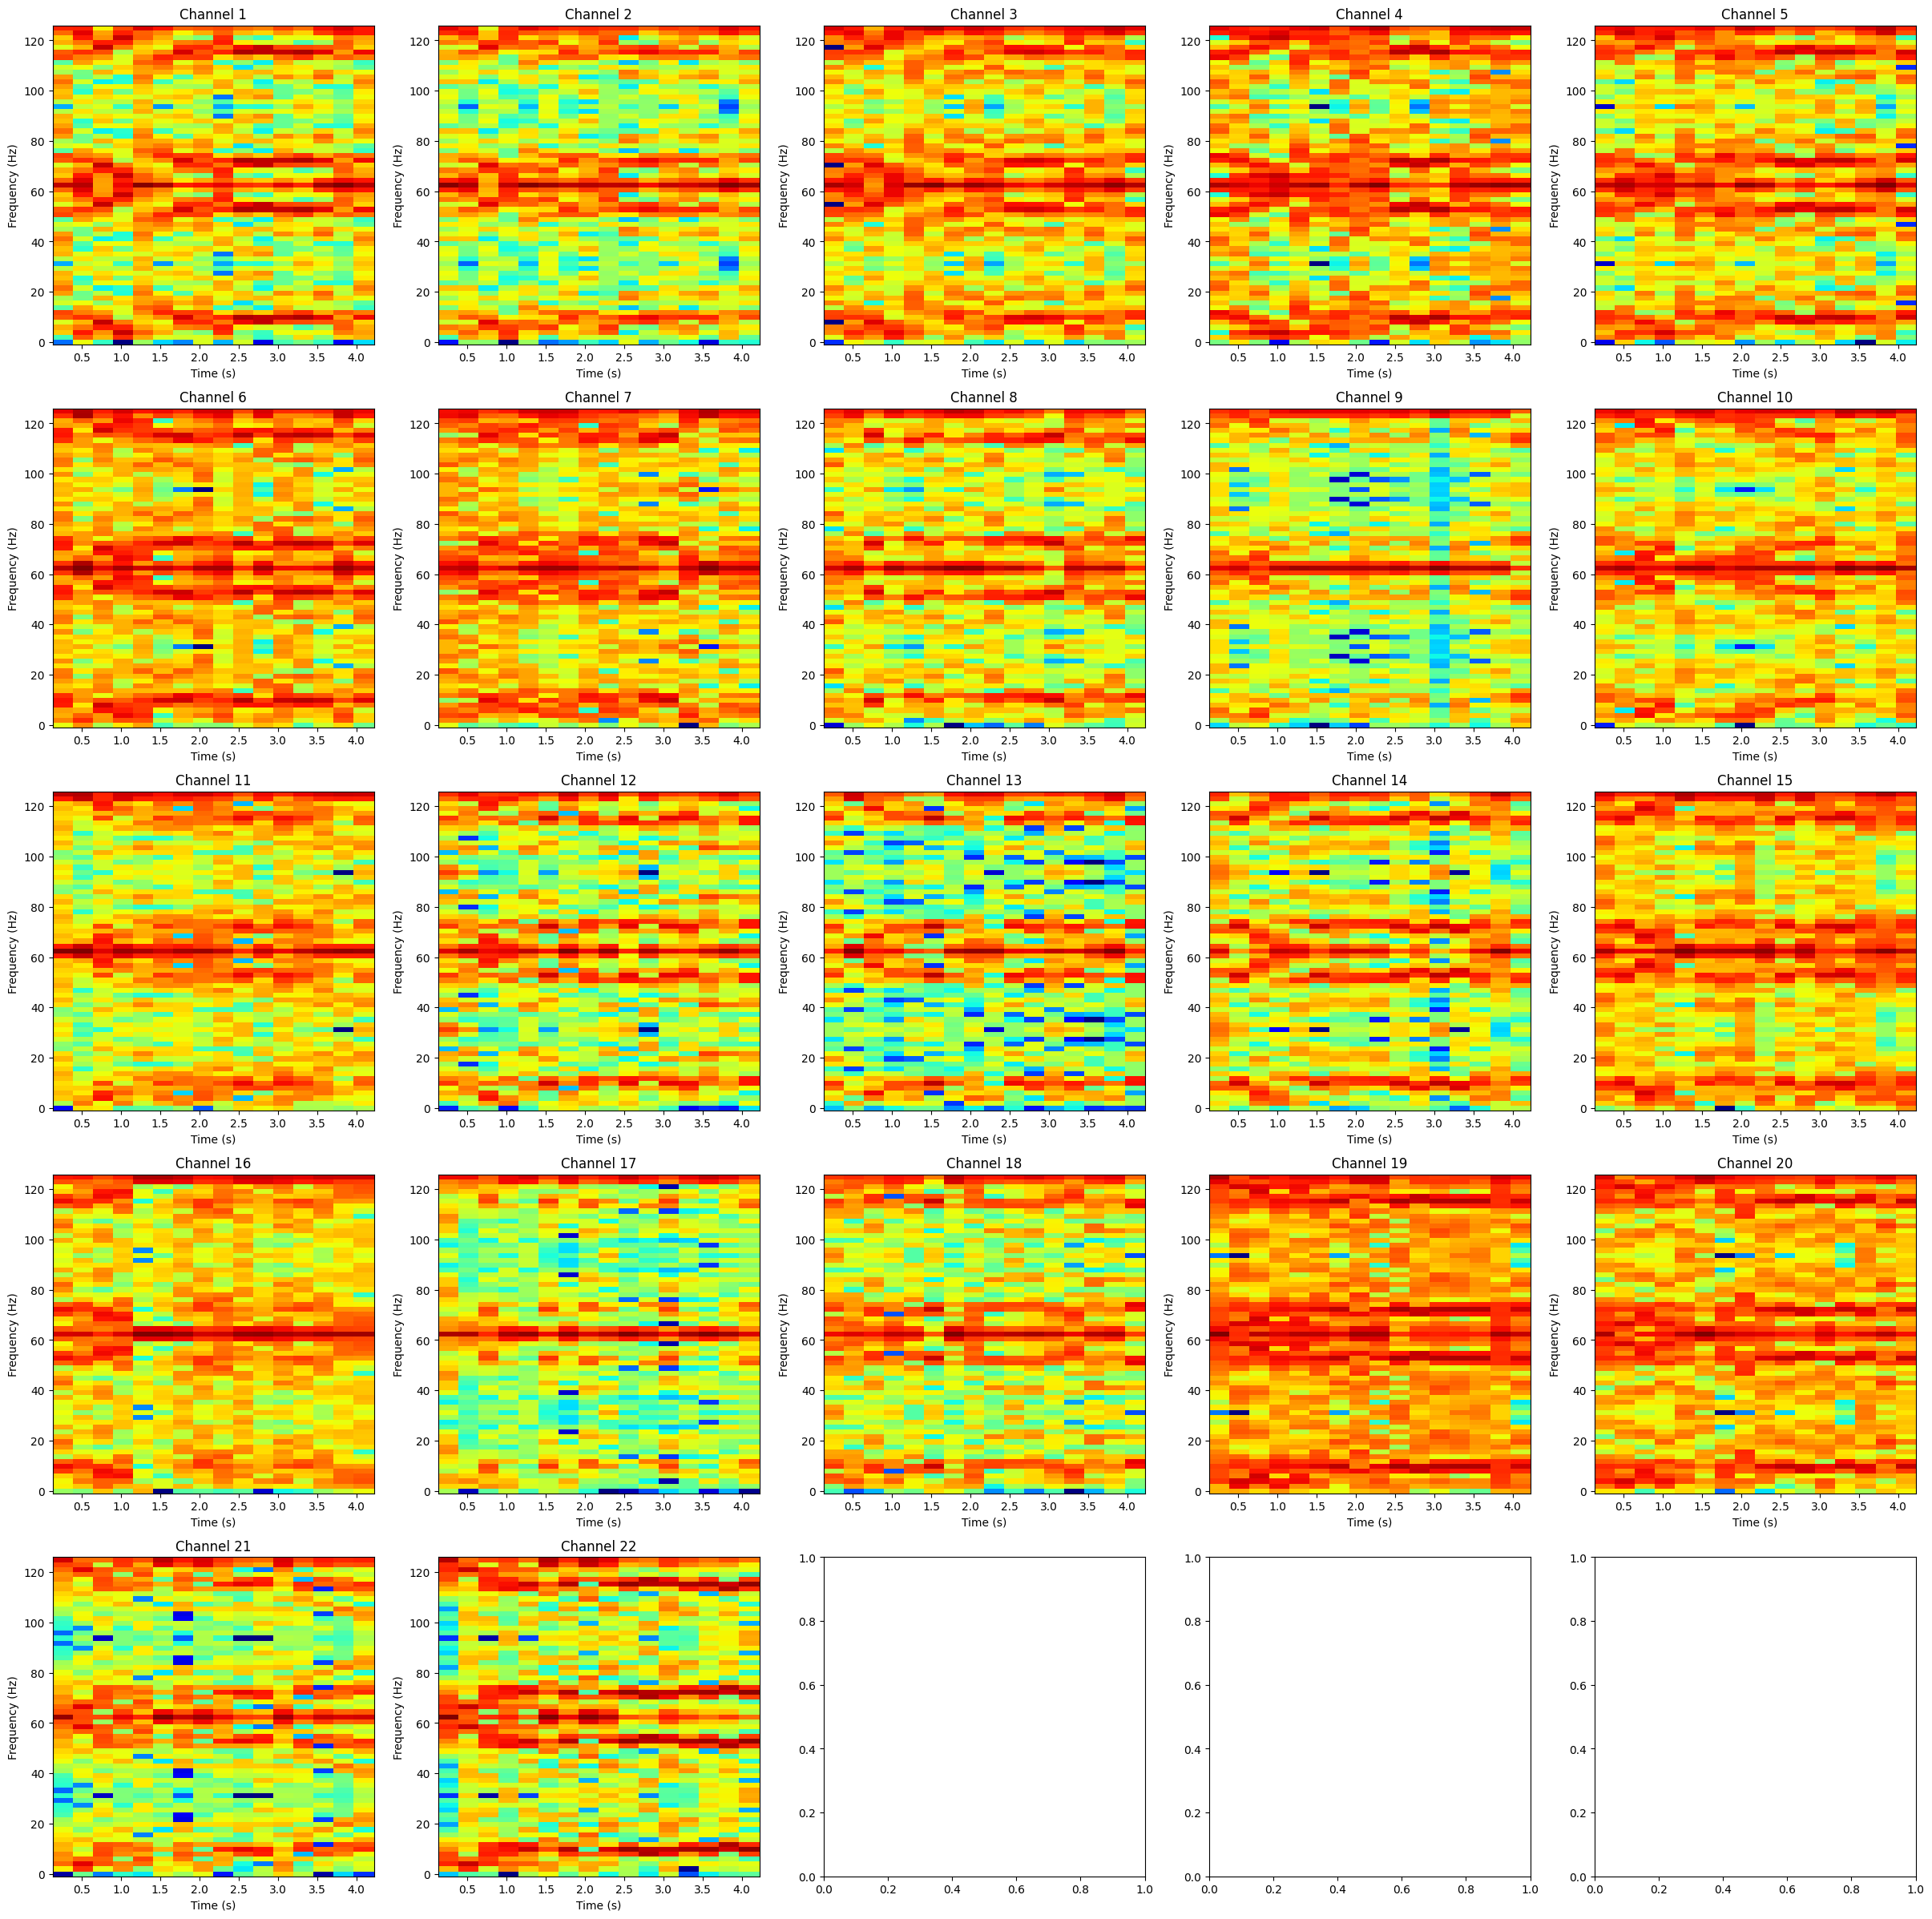

In [376]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(30, 30))
for i in range(5):
    for j in range(5):
        axs[i,j].pcolormesh(t, f, 20*np.log10(abs(spectrograms_spectrogram[0][i*5+j, :, :])), cmap='jet')
        axs[i,j].set_title('Channel ' + str(i*5+j+1))
        axs[i,j].set_xlabel('Time (s)')
        axs[i,j].set_ylabel('Frequency (Hz)')
        if(i*5+j == 21):
            break
    if(i*5+j == 21):
        break

print(spectrograms_spectrogram.shape)
plt.show()

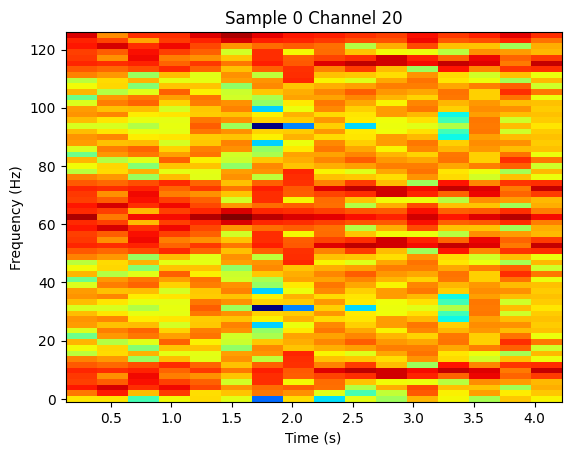

In [377]:
plt.pcolormesh(t, f, 20*np.log10(abs(spectrograms_spectrogram[0][19, :, :])), cmap='jet')
plt.title('Sample 0 Channel 20')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [378]:
fake_set = TensorDataset(fake, y_fake)

In [379]:
fake_fulltrainset, fake_evalset = random_split(fake_set, [144, 144])
fake_trainset, fake_testset = random_split(fake_fulltrainset, [96, 48])
real_fulltrainset, real_evalset = random_split(real_set, [288, 288])
real_trainset, real_testset = random_split(real_fulltrainset, [192, 96])

## Definição do modelo do classificador

In [380]:
from braindecode.util import set_random_seeds
from braindecode.models import EEGNetv4

cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
if cuda:
    torch.backends.cudnn.benchmark = False

seed = 20200220
set_random_seeds(seed=seed, cuda=cuda)

n_classes = 4
n_chans = 22
input_window_samples = 1125
F1, D = 4, 2
kernel_length = 64

model = EEGNetv4(
    n_chans,
    n_classes,
    input_window_samples=input_window_samples,
    final_conv_length='auto',
    F1=8,
    D=2,
    F2=F1*D,
    kernel_length=kernel_length,
    drop_prob=0.5
)
model.to(device);

## Treinamento do classificador com dados reais

In [381]:
from skorch.helper import predefined_split
from skorch.callbacks import LRScheduler
from braindecode import EEGClassifier

batch_size = 32
n_epochs = 50

real_clf = EEGClassifier(
    model,
    criterion=torch.nn.NLLLoss,
    optimizer=torch.optim.Adam,
    train_split=predefined_split(real_testset),
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),
    ],
    device=device,
)
real_clf.fit(real_trainset, y=None, epochs=n_epochs);

  epoch    train_accuracy    train_loss    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  ----------------  ------------  ------  ------
      1            0.4427        1.4590            0.4062        1.2837  0.0100  0.0743
      2            0.3594        1.2057            0.3750        1.3177  0.0100  0.0751
      3            0.2552        1.0853            0.3646        2.1051  0.0100  0.0738
      4            0.2500        1.0318            0.3438        3.1956  0.0099  0.0740
      5            0.2604        0.8859            0.3542        3.1848  0.0098  0.0736
      6            0.2760        0.7548            0.3542        3.0090  0.0097  0.0737
      7            0.2760        0.7819            0.3854        2.7911  0.0096  0.0738
      8            0.3542        0.7411            0.3854        2.4680  0.0095  0.0735
      9            0.4427        0.6578            0.5000        1.6622  0.0094  0.0732
     10            0.5521       

In [382]:
print(f"Mean Accuracy: {np.mean(real_clf.predict(real_evalset) == [y for X,y in real_evalset])*100:.2f}%")

Mean Accuracy: 71.88%


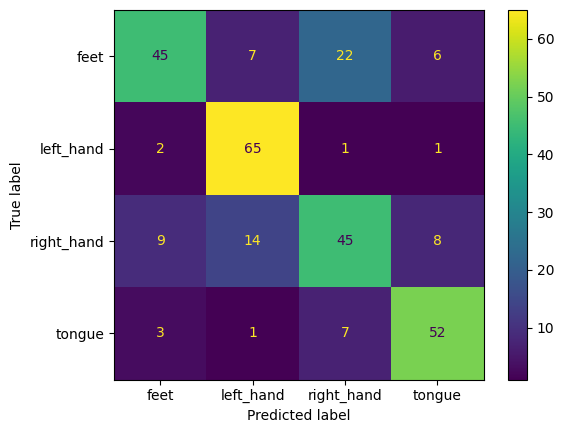

In [383]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

trtr = real_clf.predict(real_evalset)

conf_matrix = confusion_matrix(
    y_true=[y for _,y in real_evalset],
    y_pred=trtr,
    labels=list([0, 1, 2, 3]),
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, 
    display_labels=list(["feet", "left_hand", "right_hand", "tongue"])
)
disp.plot()
plt.show();

In [384]:
print(f"Mean Accuracy: {np.mean(real_clf.predict(fake_evalset) == [y for X,y in fake_evalset])*100:.2f}%")

Mean Accuracy: 20.83%


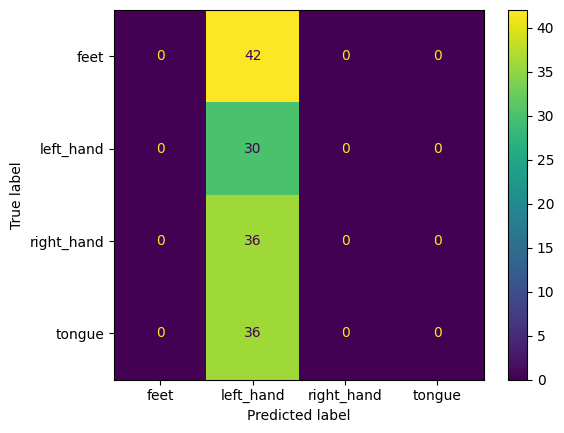

In [385]:
trts = real_clf.predict(fake_evalset)

conf_matrix = confusion_matrix(
    y_true=[y for _,y in fake_evalset],
    y_pred=trts,
    labels=list([0, 1, 2, 3]),
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, 
    display_labels=list(["feet", "left_hand", "right_hand", "tongue"])
)
disp.plot()
plt.show();

## Treinamento do classificador com dados sintéticos

In [386]:
fake_clf = EEGClassifier(
    model,
    criterion=torch.nn.NLLLoss,
    optimizer=torch.optim.Adam,
    train_split=predefined_split(fake_testset),
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),
    ],
    device=device,
)
fake_clf.fit(fake_trainset, y=None, epochs=n_epochs);

  epoch    train_accuracy    train_loss    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  ----------------  ------------  ------  ------
      1            0.2917        0.1213            0.2917        8.1438  0.0100  0.0396
      2            0.2917        0.0051            0.2917        9.6499  0.0100  0.0379
      3            0.2917        0.0030            0.2917       10.5067  0.0100  0.0387
      4            0.2917        0.0036            0.2917       11.0151  0.0099  0.0389
      5            0.2917        0.0008            0.2917       11.3185  0.0098  0.0380
      6            0.2917        0.0013            0.2917       11.5208  0.0097  0.0383
      7            0.2917        0.0003            0.2917       11.6560  0.0096  0.0387
      8            0.2917        0.0002            0.2917       11.7570  0.0095  0.0378
      9            0.2917        0.0004            0.2917       11.8327  0.0094  0.0381
     10            0.2917       

In [387]:
print(f"Mean Accuracy: {np.mean(fake_clf.predict(real_evalset) == [y for X,y in real_evalset])*100:.2f}%")

Mean Accuracy: 37.15%


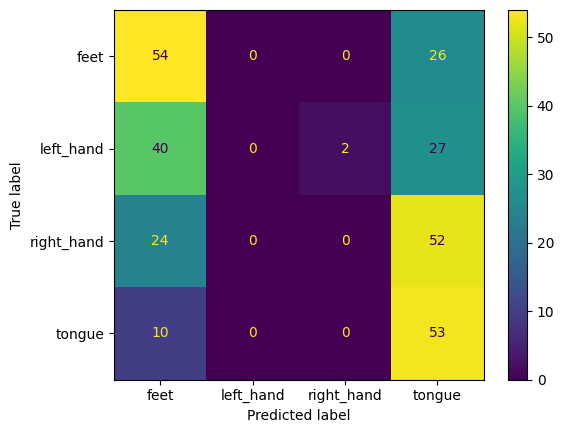

In [388]:
tstr = real_clf.predict(real_evalset)

conf_matrix = confusion_matrix(
    y_true=[y for _,y in real_evalset],
    y_pred=tstr,
    labels=list([0, 1, 2, 3]),
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, 
    display_labels=list(["feet", "left_hand", "right_hand", "tongue"])
)
disp.plot()
plt.show();

In [389]:
print(f"Mean Accuracy: {np.mean(fake_clf.predict(fake_evalset) == [y for X,y in fake_evalset])*100:.2f}%")

Mean Accuracy: 20.83%


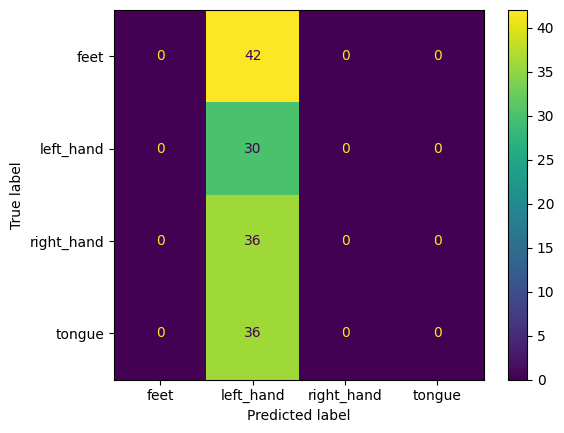

In [390]:
tsts = real_clf.predict(fake_evalset)

conf_matrix = confusion_matrix(
    y_true=[y for _,y in fake_evalset],
    y_pred=tsts,
    labels=list([0, 1, 2, 3]),
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, 
    display_labels=list(["feet", "left_hand", "right_hand", "tongue"])
)
disp.plot()
plt.show();

## Distância euclidiana entre os dados reais e sintéticos

In [391]:
size=(22, 1125)
real = X_[:288].view(-1, *size)

In [392]:
torch.norm(real-fake, 2)

tensor(16784.2812)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do